# Analyzing colony data - obtaining growth rates and morphology

The radius data and the average intensities of each full-image is saved in a csv file. Now, we're not far from obtaining the growth rates and the morphology.

The workflow for the analysis:
1. For each z-stack, find the position of the surface.
2. Collect the radius of the colony at each point above the surface.
3. Form an animated plot of the morphology by plotting the edge of the colony in x and z axis.

In [15]:
%matplotlib inline

# Dependencies
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [16]:
# Files location
base_folder = "D:/Tolga/Colony Images/"
exp_name = "EQ59_01072021_12am"
acq_name = "First12h"

csv_folder = base_folder + f"{exp_name}/{acq_name}/Resources/"
csv_path = csv_folder + f"{acq_name}_Movie.csv"

# Read csv into pandas dataframe
df = pd.read_csv(csv_path)

# remove the first Unnamed:0 column
df = df.drop("Unnamed: 0", axis=1)

df

,zar (mm),rad_t00 (mm),mean_t00,col_mean_t00,bg_mean_t00,rad_t01 (mm),mean_t01,col_mean_t01,bg_mean_t01,rad_t02 (mm),...,col_mean_t09,bg_mean_t09,rad_t10 (mm),mean_t10,col_mean_t10,bg_mean_t10,rad_t11 (mm),mean_t11,col_mean_t11,bg_mean_t11
0,-0.000,0.050904,1.821831,1.061224,1.821973,0.050904,1.913387,0.897959,1.913577,0.050904,...,3.102041,0.887236,0.050904,0.910805,15.081633,0.908155,0.050904,0.888477,10.142857,0.886747
1,-4.283,0.050904,1.686020,1.816327,1.685996,0.050904,1.890984,1.224490,1.891108,0.050904,...,6.938776,0.909357,0.050904,0.932602,4.020408,0.932025,0.025452,0.938652,8.538462,0.938275
2,-8.566,0.050904,1.610523,0.224490,1.610782,0.050904,1.816486,5.469388,1.815803,0.050904,...,12.408163,0.864580,0.050904,0.859154,13.734694,0.856747,0.050904,0.861843,8.775510,0.860364
3,-12.849,0.050904,1.527718,2.183673,1.527595,0.050904,1.725769,1.244898,1.725859,0.050904,...,12.632653,0.839238,0.025452,0.879559,25.076923,0.878359,0.050904,0.838512,8.510204,0.837078
4,-17.132,0.050904,1.504002,0.061224,1.504271,0.050904,1.697845,0.244898,1.698117,0.050904,...,18.846154,0.899855,0.050904,0.851585,11.265306,0.849638,0.025452,0.856213,5.230769,0.855996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-483.979,0.050904,0.916931,1.387755,0.916843,0.050904,0.949665,0.183673,0.949808,0.050904,...,2.857143,0.978622,0.050904,0.992435,1.795918,0.992285,0.050904,1.019230,7.102041,1.018093
114,-488.262,0.050904,0.931278,0.551020,0.931349,0.050904,0.929981,0.326531,0.930094,0.050904,...,1.102041,0.958015,0.050904,1.037697,6.387755,1.036697,0.050904,1.042419,0.918367,1.042443
115,-492.545,0.050904,0.925011,1.000000,0.924997,0.050904,0.931625,0.612245,0.931685,0.050904,...,1.142857,0.963670,0.050904,1.079540,0.530612,1.079643,0.050904,0.997524,1.938776,0.997348
116,-496.828,0.050904,0.981865,1.326531,0.981800,0.050904,1.011257,0.326531,1.011385,0.050904,...,2.959184,0.995666,0.050904,0.977764,2.857143,0.977413,0.050904,1.036434,0.530612,1.036529


## Find the surface position for each time-point

In [17]:
# For z-stack averaging the noisy data.
def window(size):
    return np.ones(size)/float(size)

Text(0, 0.5, 'Average background intensity')

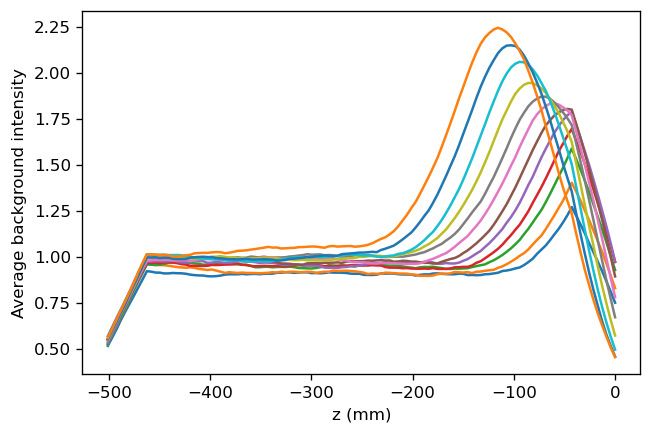

In [18]:
# 1 column is zar
# 4-columns repeating for each timepoint
tsz = int((len(df.columns)-1)/4)
dt = 1 # in hours

# z-stack values
zar = df["zar (mm)"]
tar = np.arange(0,tsz)*dt

#for each timepoint, collect bg_mean and rad_mm for each z and timepoint.
bg_mean = np.zeros((len(zar),tsz))
rad_mm = np.zeros((len(zar),tsz))
for tix in range(tsz):
    tstr = "t%02d" % (tix)
    bgcol_str = f"bg_mean_{tstr}"
    bg_mean[:,tix] = df[bgcol_str].values
    rad_str = f"rad_{tstr} (mm)"
    rad_mm[:,tix] = df[rad_str]
    
# Plot each bg_mean for different timepoints
window_average = 20
fig, ax = plt.subplots(1,1, figsize=(6,4), dpi=120)
for tix in range(tsz):
    convolved_bg_mean = np.convolve(bg_mean[:,tix], window(window_average), 'same')
    ax.plot(zar, convolved_bg_mean)

ax.set_xlabel("z (mm)")
ax.set_ylabel("Average background intensity")

Text(0, 0.5, 'Surface z value (mm)')

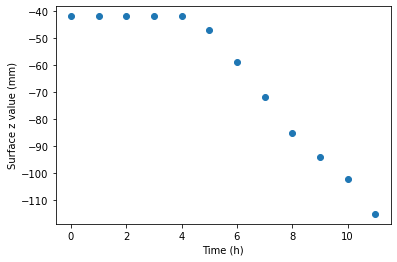

In [19]:
# The surface z-value for each timepoint:
surface_zval = np.zeros_like(tar)
for tix in range(tsz):
    convolved_bg_mean = np.convolve(bg_mean[:,tix], window(window_average), 'same')
    surface_zval[tix] = zar[np.argmax(convolved_bg_mean)]

# Plot the surface z values for all timepoints
fig,ax = plt.subplots(1,1)
ax.plot(tar, surface_zval, 'o')
ax.set_xlabel("Time (h)")
ax.set_ylabel("Surface z value (mm)")

## Collect the radius at each z-point

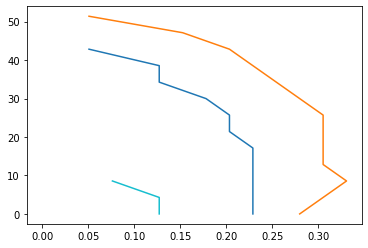

In [20]:
# Only collect the radius values above the surface for each timepoint
accepted_zvals = []
accepted_rvals = []
fig, ax = plt.subplots(1,1)
for tix in range(tsz):
    ridx = rad_mm[:,tix] > 0.1
    if (ridx.sum() > 0):
        ridx[zar[ridx].index[0]-1] = True
        accepted_idx = np.bitwise_and(zar > surface_zval[tix], ridx)
        accepted_zvals.append(zar[accepted_idx]-min(zar[accepted_idx]))
        accepted_rvals.append(rad_mm[accepted_idx,tix])
    else:
        accepted_zvals.append([0])
        accepted_rvals.append([0])
    
    ax.plot(accepted_rvals[-1], accepted_zvals[-1])

IndexError: list index out of range

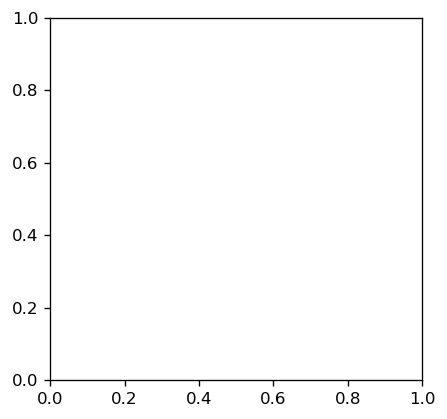

In [21]:
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=120)
plt_type = '-'
tar[0]
ax.plot(accepted_rvals[0], accepted_zvals[0], plt_type, 
        accepted_rvals[10], accepted_zvals[10], plt_type,
        accepted_rvals[20], accepted_zvals[20], plt_type,
        accepted_rvals[30], accepted_zvals[30], plt_type,
        accepted_rvals[40], accepted_zvals[40], plt_type,
        accepted_rvals[47], accepted_zvals[47], plt_type)
ax.set_xlim(0, 1.5)
ax.set_ylim(0,0.2)
ax.set_xlabel("Radius (mm)")
ax.set_ylabel("Height (mm)")
tar

In [22]:
# Calculate radial growth rate
surface_rad_lo = np.zeros_like(tar)
height_lo = np.zeros_like(tar)
for tix in range(len(tar)):
    t = tar[tix]
    surface_rad_lo[tix] = np.array(accepted_rvals[tix])[-1]
    height_lo[tix] = np.array(accepted_zvals[tix])[0]

In [23]:
tar_lo = np.arange(0,len(height_lo))*1
# tar_hi = np.arange(0,len(height_hi))*0.5 + 17

prad_lo = np.polyfit(tar_lo, surface_rad_lo, 1)
# prad_hi = np.polyfit(tar_hi, surface_rad_hi, 1)
pheight_lo = np.polyfit(tar_lo[4:], height_lo[4:], 1)
# pheight_hi = np.polyfit(tar_hi, height_hi, 1)

In [24]:
# print(prad_hi)
print(prad_lo)
# print(pheight_hi)
print(pheight_lo)

[0. 0.]
[  7.03571429 -40.14285714]


Text(0, 0.5, 'Height (mm)')

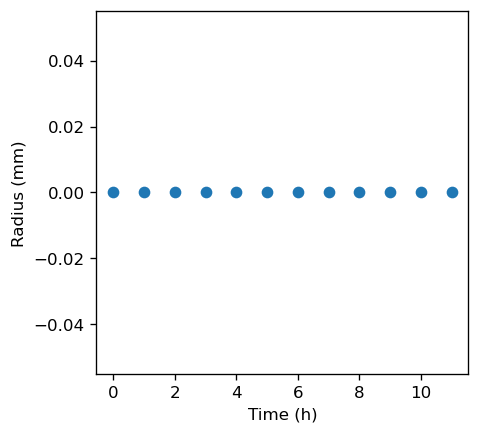

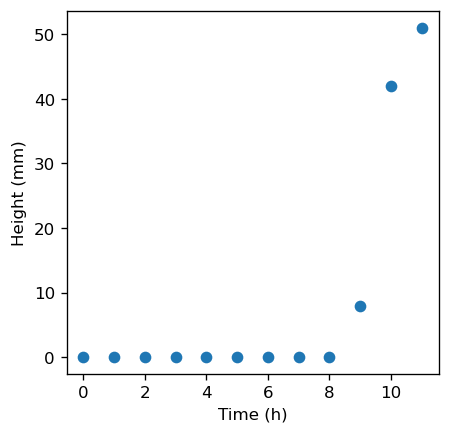

In [25]:
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=120)
ax.plot(tar_lo, surface_rad_lo, 'o')#, tar_hi, surface_rad_hi, 'o')
rspeed = 0.055 #mm/h
x = np.linspace(0,40)
y = rspeed*(x)
# ax.plot(x,y,'-')
ax.set_xlabel("Time (h)")
ax.set_ylabel("Radius (mm)")
# ax.set_xlim(10,35)
# ax.set_ylim(0,1)

# hspeed = 
fig2, ax2 = plt.subplots(1,1, figsize=(4,4), dpi=120)
ax2.plot(tar_lo, height_lo, 'o')#, tar_hi, height_hi, 'o')
ax2.set_xlabel("Time (h)")
ax2.set_ylabel("Height (mm)")
# ax2.set_xlim(10,35)
# ax2.set_ylim(0,0.3)

In [ ]:
height_hi = height

In [ ]:
surface_rad